In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import xarray as xr
import os
import calendar
import string
%matplotlib inline

In [2]:
# set e3sm
e3sm_root = '/global/homes/q/qingli/project/cmip6_projection/data'
e3smcase_list = [
    '20180215.DECKv1b_H1.ne30_oEC.edison',
    '20180220.DECKv1b_H2.ne30_oEC.edison',
    '20180302.DECKv1b_H3.ne30_oEC.edison',
    '20180305.DECKv1b_H4.ne30_oEC.edison',
    '20180307.DECKv1b_H5.ne30_oEC.edison',
    '20190404.DECKv1b_H1_hist-GHG.ne30_oEC.edison',
    '20190404.DECKv1b_H2_hist-GHG.ne30_oEC.edison',
    '20190404.DECKv1b_H3_hist-GHG.ne30_oEC.edison',
    ]
ivar = 0
var_list = ['siarean', 'siareas', 'sivoln', 'sivols']
varname = var_list[ivar]
var_list = ['iceArea', 'iceArea', 'iceVolume', 'iceVolume']
var = var_list[ivar]
file_list = ['seaIceAreaVolNH.nc', 'seaIceAreaVolSH.nc', 'seaIceAreaVolNH.nc', 'seaIceAreaVolSH.nc']
filename = file_list[ivar]
convert_m2km = 1e12
            

In [3]:
# load e3sm data
ne3smcase = len(e3smcase_list)
f_init = False
for i in np.arange(ne3smcase):
    infile = e3sm_root+'/mpas_analysis_processed/'+e3smcase_list[i]+'/timeseries/'+filename
    print('Opening file {:}...'.format(infile))
    dset = xr.open_dataset(infile)
    if not f_init:
        e3sm_time = dset.Time
        e3sm_ntime = e3sm_time.size
        e3sm_data = np.zeros([ne3smcase, e3sm_ntime])
        f_init = True
    ntime = dset.Time.size
    e3sm_data[i,0:ntime] = dset.variables[var][0:]/convert_m2km
    if ntime < e3sm_ntime:
        e3sm_data[i,ntime:] = np.nan

Opening file /global/homes/q/qingli/project/cmip6_projection/data/mpas_analysis_processed/20180215.DECKv1b_H1.ne30_oEC.edison/timeseries/seaIceAreaVolNH.nc...
Opening file /global/homes/q/qingli/project/cmip6_projection/data/mpas_analysis_processed/20180220.DECKv1b_H2.ne30_oEC.edison/timeseries/seaIceAreaVolNH.nc...
Opening file /global/homes/q/qingli/project/cmip6_projection/data/mpas_analysis_processed/20180302.DECKv1b_H3.ne30_oEC.edison/timeseries/seaIceAreaVolNH.nc...
Opening file /global/homes/q/qingli/project/cmip6_projection/data/mpas_analysis_processed/20180305.DECKv1b_H4.ne30_oEC.edison/timeseries/seaIceAreaVolNH.nc...
Opening file /global/homes/q/qingli/project/cmip6_projection/data/mpas_analysis_processed/20180307.DECKv1b_H5.ne30_oEC.edison/timeseries/seaIceAreaVolNH.nc...
Opening file /global/homes/q/qingli/project/cmip6_projection/data/mpas_analysis_processed/20190404.DECKv1b_H1_hist-GHG.ne30_oEC.edison/timeseries/seaIceAreaVolNH.nc...
Opening file /global/homes/q/qingli/p

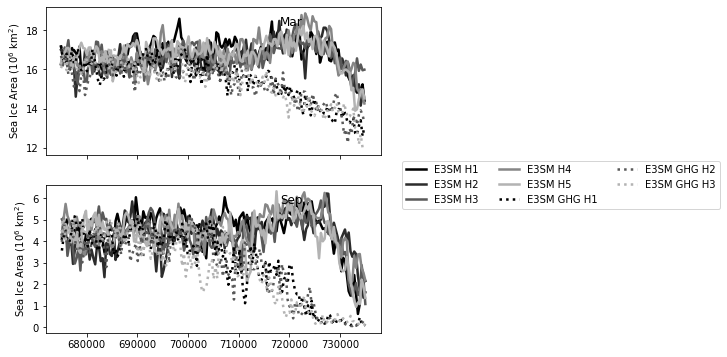

In [4]:
cmap2 = cm.get_cmap('gray')
# ifrac2 = np.linspace(0,0.7,ne3smcase)
ifrac2 = np.linspace(0,0.7,5)
ifrac3 = np.linspace(0,0.7,ne3smcase-5)

fig, axarr = plt.subplots(2,1, sharex='col' )
fig.set_size_inches(6, 6)
imon_list = [2, 8]
for i,imon in enumerate(imon_list):
    e3sm_label = []
    axarr[i].set_ylabel('Sea Ice Area ($10^6$ km$^2$)')
    axarr[i].text(0.7, 0.85, calendar.month_abbr[imon+1], \
                    transform=axarr[i].transAxes, \
                    fontsize=12, color='k', va='bottom')
    for k in np.arange(ne3smcase):
        if k <= 4:
            label = 'E3SM H{:d}'.format(k+1)
            axarr[i].plot(e3sm_time[imon::12], e3sm_data[k,imon::12], \
                          color=cmap2(ifrac2[k]), linewidth=2.5, label=label)
        else:
            label = 'E3SM GHG H{:d}'.format(k-4)
            axarr[i].plot(e3sm_time[imon::12], e3sm_data[k,imon::12], \
                          color=cmap2(ifrac3[k-5]), linestyle='dotted', \
                          linewidth=2.5, label=label)
        e3sm_label.append(label)

axarr[1].legend(loc='center left', bbox_to_anchor=(1.05, 1.), ncol=3)


In [5]:
print(e3sm_label)

['E3SM H1', 'E3SM H2', 'E3SM H3', 'E3SM H4', 'E3SM H5', 'E3SM GHG H1', 'E3SM GHG H2', 'E3SM GHG H3']


In [6]:
np.savez('e3sm_'+varname+'_historical.npz', data=e3sm_data, time=e3sm_time, label=e3sm_label)